# Trabajo pr√°ctico integrador - Aprendizaje de M√°quinas I
## Carrera de Especializaci√≥n En Inteligencia Artificial - Cohorte 17
### Autores:
* Horn, Mart√≠n
* Lloveras, Alejandro
* M√©ndez, Diego Mart√≠n
* Micozzi, Mar√≠a Luz
* Ru√≠z Otondo, Juan

**Objetivo del trabajo**

Comprender y modelar los factores que influyen en la popularidad de las canciones en Spotify, con el fin de generar insights que permitan optimizar la creaci√≥n, promoci√≥n y recomendaci√≥n musical, as√≠ como desarrollar herramientas de an√°lisis y visualizaci√≥n innovadoras.

In [1]:
# Importamos librer√≠as
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

## Dataset

In [2]:
# Importa CSV del dataset
df = pd.read_csv('datasets/spotify_songs.csv')

El dataset contiene m√°s de 30000 registros de canciones de Spotify de 6 categorias (EDM, Latin, Pop, R&B, Rap y Rock) tomados por medio de la API de Spotify.

El dataset cuenta con informaci√≥n actualizada a fines del 2023.

Nos centraremos en el campo track_popularity y buscaremos su relaci√≥n con otros campos que describen las caracter√≠sticas musicales como: key, tempo, danceability, energy, etc.; o el g√©nero/subg√©nero y a√±o de lanzamiento.

### Fuentes

__*Original dataset:*__

https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs

__*API scraper repository:*__

https://github.com/charlie86/spotifyr/

### Campos:

| Variable                  | Descripci√≥n                                                                                                                                                                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`                | ID √∫nico de la canci√≥n                                                                                                                                                                                                                          |
| `track_name`              | Nombre de la canci√≥n                                                                                                                                                                                                                             |
| `track_artist`            | Artista de la canci√≥n                                                                                                                                                                                                                            |
| `track_popularity`        | Popularidad de la canci√≥n (0-100), donde un valor m√°s alto indica una mayor popularidad                                                                                                                                                         |
| `track_album_id`          | ID √∫nico del √°lbum                                                                                                                                                                                                                               |
| `track_album_name`        | Nombre del √°lbum de la canci√≥n                                                                                                                                                                                                                  |
| `track_album_release_date`| Fecha de lanzamiento del √°lbum                                                                                                                                                                                                                   |
| `playlist_name`           | Nombre de la lista de reproducci√≥n                                                                                                                                                                                                              |
| `playlist_id`             | ID de la lista de reproducci√≥n                                                                                                                                                                                                                   |
| `playlist_genre`          | G√©nero de la lista de reproducci√≥n                                                                                                                                                                                                               |
| `playlist_subgenre`       | Subg√©nero de la lista de reproducci√≥n                                                                                                                                                                                                            |
| `danceability`            | Describe qu√© tan adecuada es una pista para bailar, bas√°ndose en una combinaci√≥n de elementos musicales. Un valor de 0.0 es menos bailable y 1.0 es m√°s danceable.                                                            |
| `energy`                  | La energ√≠a es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. T√≠picamente, las pistas energ√©ticas se sienten r√°pidas y ruidosas.                                                                 |
| `key`                     | La tonalidad general estimada de la pista. Los enteros se asignan a notas utilizando la notaci√≥n est√°ndar de Clase de Tonos. Ej. 0 = C, 1 = C‚ôØ/D‚ô≠, 2 = D, y as√≠ sucesivamente. Si no se detecta tonalidad, el valor es -1.                          |
| `loudness`                | La sonoridad general de una pista en decibelios (dB). Los valores t√≠picos oscilan entre -60 y 0 dB.                                                                                     |
| `mode`                    | El modo indica la modalidad (mayor o menor) de una pista. Mayor est√° representado por 1 y menor por 0.                                                                                  |
| `speechiness`             | La presencia de palabras habladas en una pista. Los valores por encima de 0.66 describen pistas que probablemente est√°n hechas completamente de palabras habladas.                                                                           |
| `acousticness`            | Una medida de confianza de 0.0 a 1.0 sobre si la pista es ac√∫stica. 1.0 representa una alta confianza en que la pista es ac√∫stica.                                                     |
| `instrumentalness`        | Predice si una pista no contiene voces. Valores por encima de 0.5 est√°n destinados a representar pistas instrumentales.                                                                  |
| `liveness`                | Detecta la presencia de una audiencia en la grabaci√≥n. Un valor superior a 0.8 proporciona una alta probabilidad de que la pista sea en vivo.                                          |
| `valence`                 | Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan m√°s positivas (por ejemplo, felices, alegres, euf√≥ricas), mientras que las pistas con baja valencia suenan m√°s negativas (por ejemplo, tristes, deprimidas, enojadas). |
| `tempo`                   | El tempo estimado general de una pista en beats por minuto (BPM).                                                                                                                      |
| `duration_ms`             | Duraci√≥n de la canci√≥n en milisegundos                                                                                                                                                                                                          |


## Exploraci√≥n y Comprensi√≥n de los Datos

In [3]:
df.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
df.head(3)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   

   track_artist  track_popularity          track_album_id  \
0    Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1      Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2  Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0653    0.518  122.036       194754  
1          0.004210    0.3570    0.693   99.972       162600  
2          0.000023    0.1100    0.613  124.008       176616

In [6]:
df.tail(3)

track_id                      track_name  track_artist  \
32830  7ImMqPP3Q1yfUHvsdn7wEo    Sweet Surrender - Radio Edit   Starkillers   
32831  2m69mhnfQ1Oq6lGtXuYhgX  Only For You - Maor Levi Remix        Mat Zo   
32832  29zWqhca3zt5NsckZqDf6c          Typhoon - Original Mix  Julian Calor   

       track_popularity          track_album_id              track_album_name  \
32830                14  0ltWNSY9JgxoIZO4VzuCa6  Sweet Surrender (Radio Edit)   
32831                15  1fGrOkHnHJcStl14zNx8Jy        Only For You (Remixes)   
32832                27  0X3mUOm6MhxR7PzxG95rAo                 Typhoon/Storm   

      track_album_release_date    playlist_name             playlist_id  \
32830               2014-04-21  ‚ô• EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32831               2014-01-01  ‚ô• EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   
32832               2014-03-03  ‚ô• EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux   

      playlist_genre          playlist_subgenre  danceability  energy  key  \
32830            edm  progressive electro house         0.529   0.821    6   
32831            edm  progressive electro house         0.626   0.888    2   
32832            edm  progressive electro house         0.603   0.884    5   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
32830    -4.899     0       0.0481      0.108000          0.000001     0.150   
32831    -3.361     1       0.1090      0.007920          0.127000     0.343   
32832    -4.571     0       0.0385      0.000133          0.341000     0.742   

       valence    tempo  duration_ms  
32830   0.4360  127.989       210112  
32831   0.3080  128.008       367432  
32832   0.0894  127.984       337500

## T√©cnicas de Visualizaci√≥n

Nos interesa ver espec√≠ficamente la relaci√≥n entre 'track_popularity' y distintas features musicales.

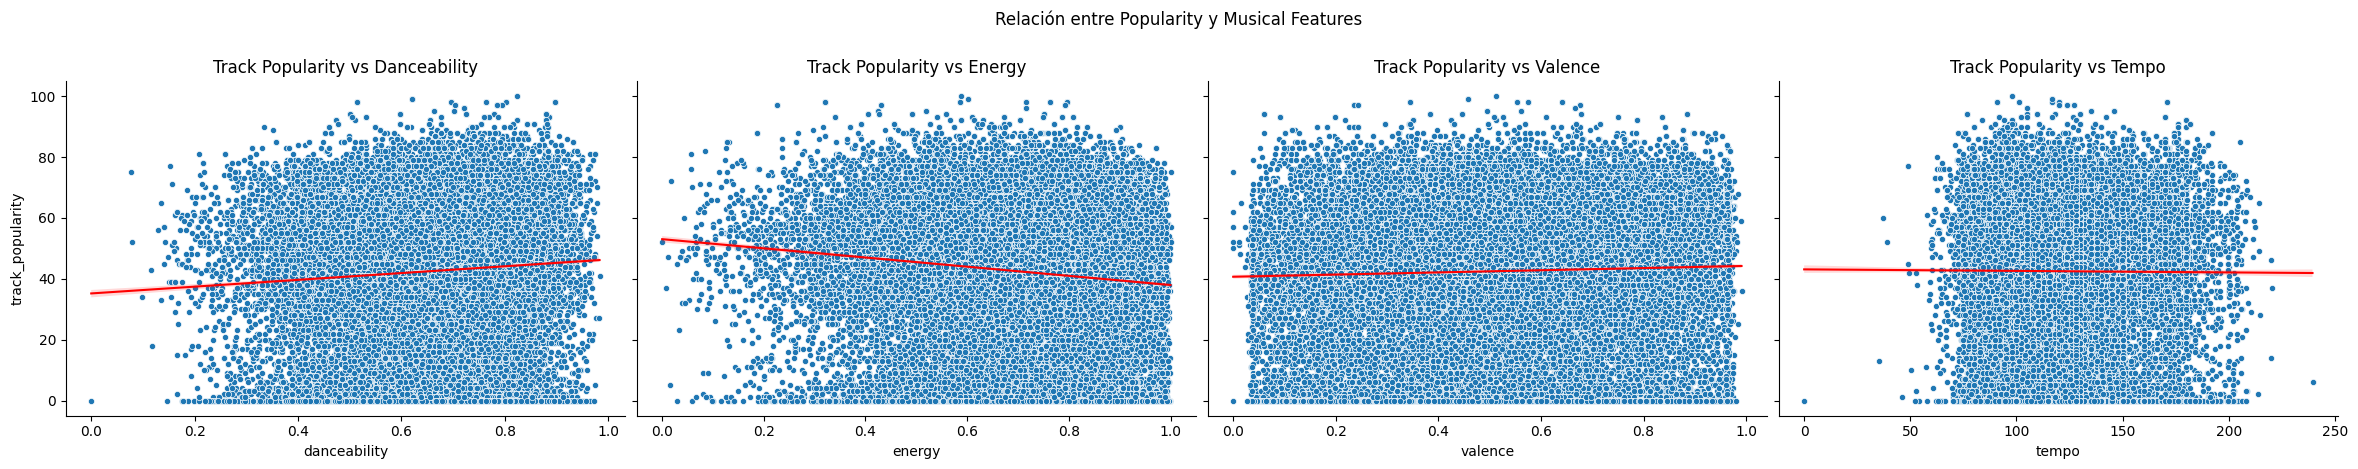

In [7]:
pp = sns.pairplot(df,
                 x_vars=['danceability', 'energy', 'valence', 'tempo'],
                 y_vars='track_popularity',
                 height=4,
                 aspect=1.5,
                 kind='scatter',
                 plot_kws={'s': 20, 'edgecolor': 'w', 'linewidth': 0.5}
)

# Agregamos l√≠neas de regresi√≥n
for ax in pp.axes.flat:
    sns.regplot(
        x=ax.collections[0].get_offsets()[:, 0],
        y=ax.collections[0].get_offsets()[:, 1],
        ax=ax,
        scatter=False,
        color='red',
        line_kws={'linewidth': 1.5}
    )

# Leyenda
for ax, feature in zip(pp.axes.flat, ['Danceability', 'Energy', 'Valence', 'Tempo']):
    ax.set_title(f'Track Popularity vs {feature}')
plt.suptitle('Relaci√≥n entre Popularity y Musical Features', y=1.15)

plt.show()

Puede apreciarse que en todos los casos la correlaci√≥n es muy baja. Puede concluirse que ni el Tempo ni la Valencia (positividad musical transmitida) tienen influencia sobre la popularidad.

Para 'Danceability' (musica bailable) y 'Energy' se aprecia una m√≠nima correlaci√≥n, pero no llega a ser determinante.

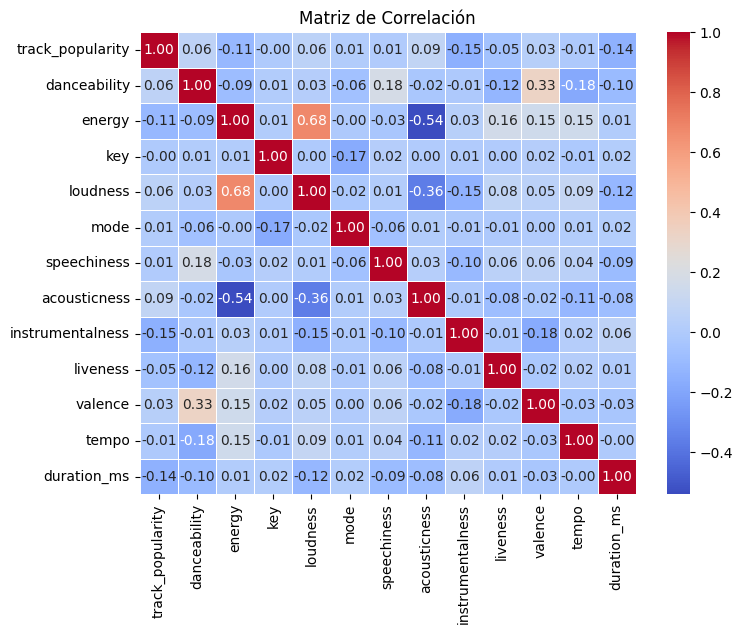

In [8]:
# Seleccionar solo columnas num√©ricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlaci√≥n
correlation_matrix = numeric_df.corr()

# Crear un gr√°fico de calor (heatmap) de la matriz de correlaci√≥n
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaci√≥n')
plt.show()

Corroboramos la baja correlaci√≥n entre la  mayor√≠a de los features.

En los casos que se aprecia una correlaci√≥n mayor (loudness/energy, acousticness/energy, loudness/acousticness), se trata de variables sint√©ticas, construidas en funci√≥n de 'loudness' (par√°metro ac√∫stico) y otras caracter√≠sticas del audio.

En el caso de 'valence/danceability' expresa una relaci√≥n entre la m√∫sica bailable y la "positividad" transmitida por la pista.

Podemos ver que 'track_popularity' presenta una baja correlaci√≥n con todas las variables.
S√≥lo se aprecia una relaci√≥n levemente mayor para: instrumentalness, duration_ms y energy.

Cabe destacar que todas estas correlaciones son m√≠nimas (menores a +/- 0.15).



Analizamos la distribuci√≥n de los datos dado que observamos que algunos valores se encontraban con una distribuci√≥n sesgada.

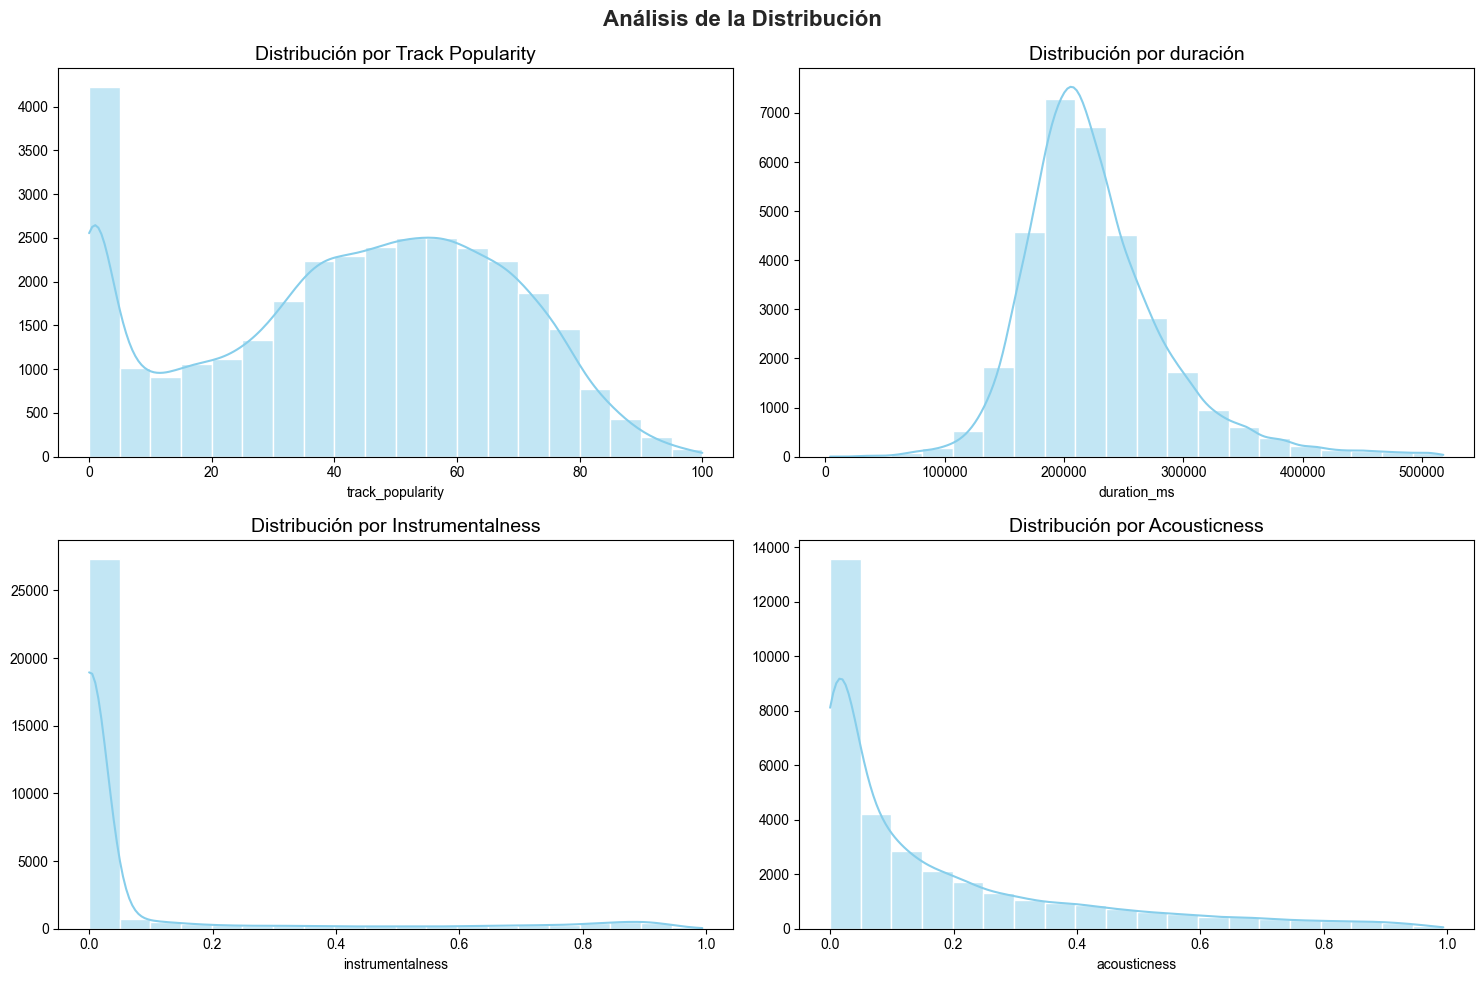

In [9]:
# An√°lisis de la distribuci√≥n

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.set(style="whitegrid")
plt.title('Variables con igual rango (0 a 1)', fontsize=14)

# Graficamos la distribuci√≥n del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Distribuci√≥n por Track Popularity', fontsize=14)
axes[0, 0].set_ylabel('')

# Graficamos la distribuci√≥n del campo acousticness
sns.histplot(data=df, x='duration_ms', bins=20, kde=True, color="skyblue", ax=axes[0, 1])
axes[0, 1].set_title('Distribuci√≥n por duraci√≥n', fontsize=14)
axes[0, 1].set_ylabel('')

# Graficamos la distribuci√≥n del campo acousticness
sns.histplot(data=df, x='instrumentalness', bins=20, kde=True, color="skyblue", ax=axes[1, 0])
axes[1, 0].set_title('Distribuci√≥n por Instrumentalness', fontsize=14)
axes[1, 0].set_ylabel('')

# Graficamos la distribuci√≥n del campo acousticness
sns.histplot(data=df, x='acousticness', bins=20, kde=True, color="skyblue", ax=axes[1, 1])
axes[1, 1].set_title('Distribuci√≥n por Acousticness', fontsize=14)
axes[1, 1].set_ylabel('')

plt.suptitle('An√°lisis de la Distribuci√≥n', fontsize=16, fontweight='bold')
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

Existe un gran n√∫mero de pistas con 'track_popularity' cercano a 0. Posiblemente porque no han sido rankeadas por falta de escuchas.

La mayor√≠a de las canciones tienen una duraci√≥n de 3 min 20 seg. Casi no hay pistas por debajo de 1 min 30 seg. En el extremo superior se aprecia una distribuci√≥n de cola larga.

Tanto 'instrumentalness' como 'acousticness' est√°n muy sesgados hacia la izquierda.

Para los violin plot, separamos las variables 'duration_ms', 'tempo' y 'track_popularity' por tener un rango diferente que impide la visualizaci√≥n.

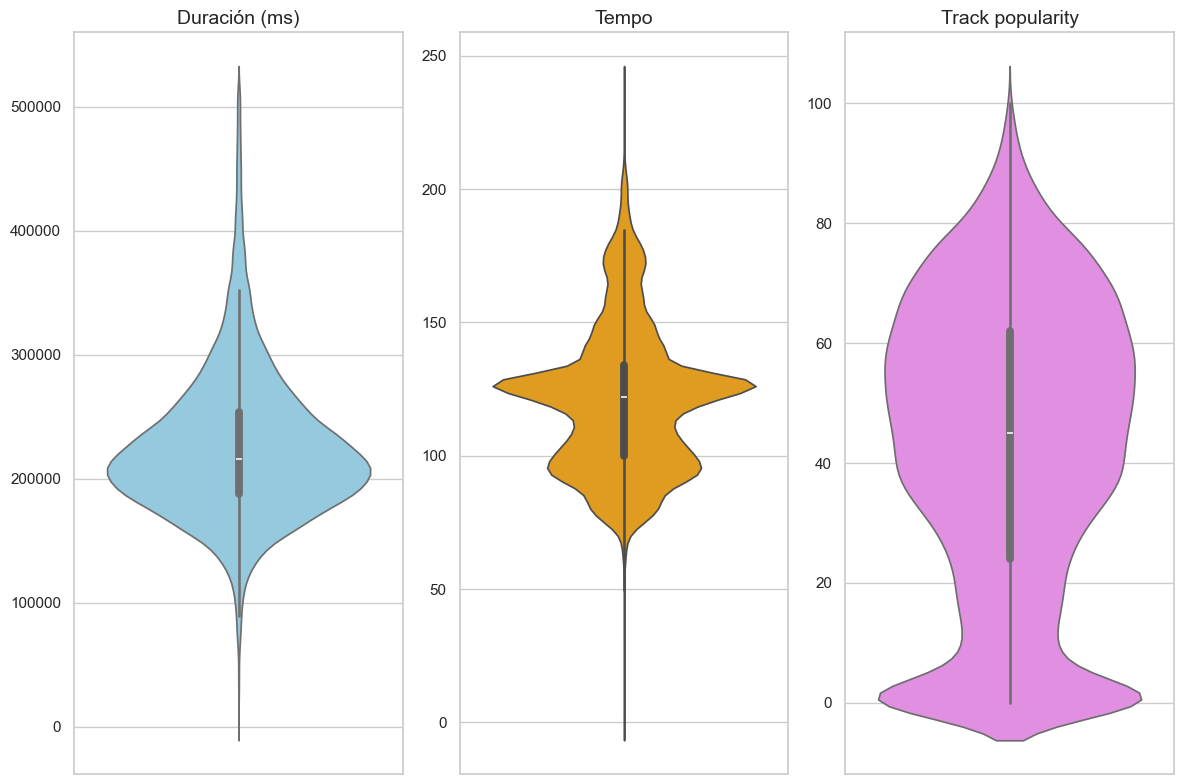

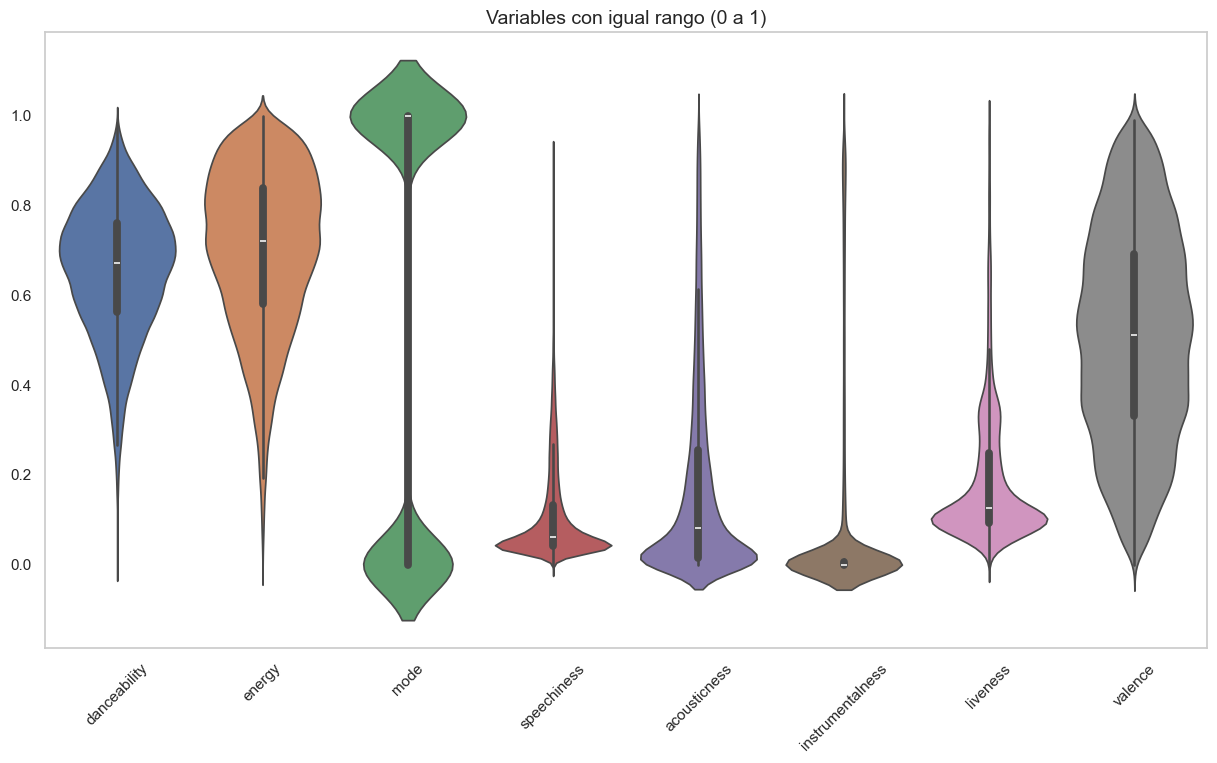

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

# Primer subplot (fila 0, columna 0)
sns.violinplot(ax=axes[0], data=df['duration_ms'], color='skyblue')
axes[0].set_title('Duraci√≥n (ms)', fontsize=14)
axes[0].set_ylabel('')

# Segundo subplot (fila 0, columna 1)
sns.violinplot(ax=axes[1], data=df['tempo'], color='orange')
axes[1].set_title('Tempo', fontsize=14)
axes[1].set_ylabel('')

# Tercer subplot (fila 1, columna 0)
sns.violinplot(ax=axes[2], data=df['track_popularity'], color='violet')
axes[2].set_title('Track popularity', fontsize=14)
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot( data=df.drop(['duration_ms','tempo','track_popularity','loudness','key'],axis=1))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

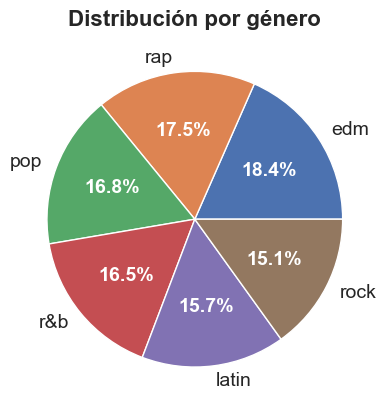

In [11]:
# Estudiamos la distrubici√≥n por g√©nero
sample = df.groupby('playlist_genre').agg({'track_id': 'count'}).rename(columns={'track_id': 'track_count'}).sort_values(by='track_count', ascending=False)
track_counts = sample['track_count']

wedges, texts, autotexts = plt.pie(
    track_counts,
    labels=sample.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribuci√≥n por g√©nero', fontsize=16, fontweight='bold')
plt.show()

El dataset se encuentra distribuido uniformemente para cada g√©nero.

In [12]:
#An√°lisis de la distribuci√≥n por a√±o
def a√±o_lanzamiento(date):
    if len(date) == 4:
        a√±o = date
        return a√±o
    else:
        a√±o = pd.to_datetime(date, errors='coerce').year
        return a√±o

In [13]:
# Creaamos un campo year en base al track_album_release_date
df['year'] = df['track_album_release_date'].apply(a√±o_lanzamiento).astype(int)

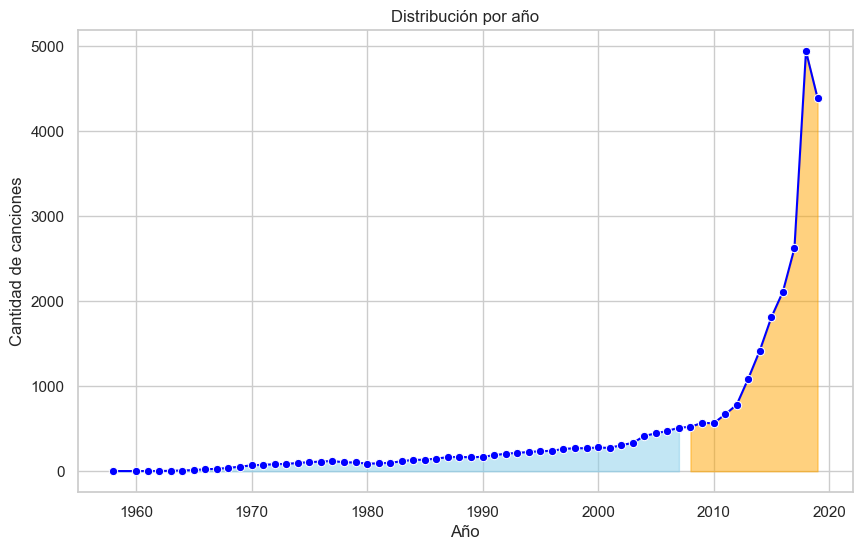

In [14]:
# Graficamos la distribuci√≥n de canciones por a√±o

yearly_tracks = df['year'].value_counts().sort_index()
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Distribuci√≥n por a√±o')
plt.xlabel('A√±o')
plt.ylabel('Cantidad de canciones')
plt.grid(True)

max_year = yearly_tracks.idxmax()
max_value = yearly_tracks.max()
plt.annotate(f'Maximum in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2008, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2008, color='orange', alpha=0.5)

plt.show()

Queda claro que a partir de 2010 la cantidad de canciones publicadas por a√±o (en Spotify) aumenta notablemente. Es importante destacar que la aplicaci√≥n se encuentra disponible desde 2008. Las canciones publicadas antes de este a√±o podr√≠a estar sufriendo un sesgo de supervivencia (s√≥lo se agregan las canciones que han perdurado).

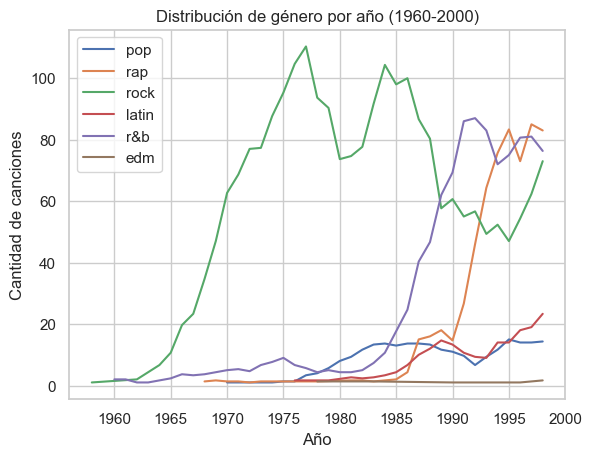

In [15]:
#Distribuci√≥n de g√©nero por a√±o
genres = df['playlist_genre'].unique()
df_yr = df[df['year'] < 2000]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

plt.xlabel('A√±o')
plt.ylabel('Cantidad de canciones')
plt.title('Distribuci√≥n de g√©nero por a√±o (1960-2000)')
#plt.yscale('log')
plt.legend()
plt.show()


Puede verse la evoluci√≥n de los distintos g√©neros a trav√©s de los a√±os.

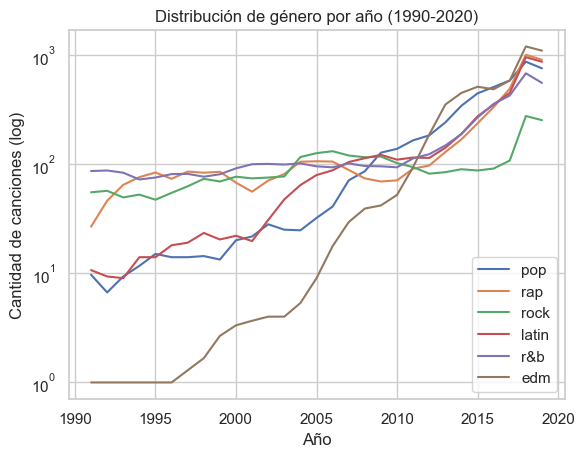

In [16]:
#Distribuci√≥n de g√©nero por a√±o
df_yr = df[df['year'] >= 1990]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

# A√±adir etiquetas y t√≠tulo
plt.xlabel('A√±o')
plt.ylabel('Cantidad de canciones (log)')
plt.title('Distribuci√≥n de g√©nero por a√±o (1990-2020)')
plt.yscale('log')
plt.legend()
plt.show()

Es destacable el surgimiento del g√©nero 'edm' a partir 1995 y el declino del 'rock' a partir de 2010.

En 2017 se produce un incremento similar de la cantidad de canciones en todos los g√©neros.

## Limpieza del Dataset

### Identificaci√≥n de valores nulos

track_id            0
track_name          5
track_artist        5
track_popularity    0
track_album_id      0
                   ..
liveness            0
valence             0
tempo               0
duration_ms         0
year                0
Length: 24, dtype: int64


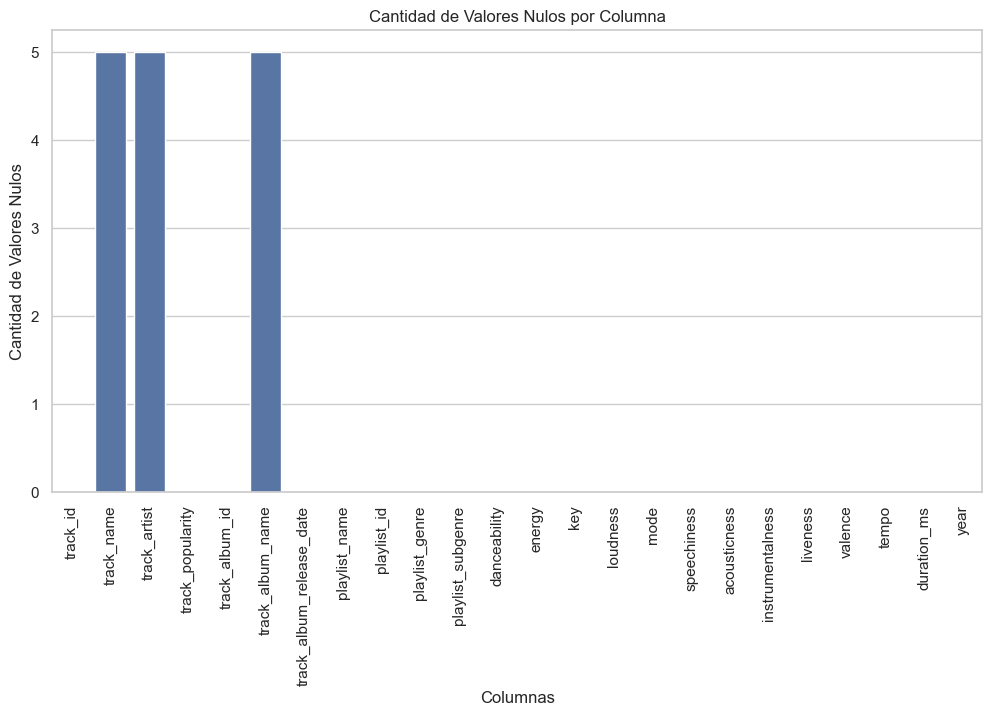

In [17]:
# Vemos la cantidad de valores nulos por cada campo
null_counts = df.isnull().sum()
print(null_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')
plt.xticks(rotation=90)
plt.show()

Se identifican 5 pistas que no tienen informaci√≥n de 'track_name' y 'track_artist', posiblemente se trata de las mismas canciones.

In [18]:
# filtramos para ver los registros con valores nulos
null_data = df[df.isnull().any(axis=1)]
null_data

track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  \
8151              HIP&HOP  5DyJsJZOpMJh34WvUrQzMV            rap   
9282          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap   
9283          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap   
19568  Reggaeton viejitoüî•  0si5tw70PIgPkY1Eva6V8f          latin   
19811       latin hip hop  3nH8aytdqNeRbcRCg3dw9q          latin   

      playlist_subgenre  danceability  energy  key  loudness  mode  \
8151   southern hip hop         0.714   0.821    6    -7.635     1   
9282       gangster rap         0.678   0.659   11    -5.364     0   
9283       gangster rap         0.465   0.820   10    -5.907     0   
19568         reggaeton         0.675   0.919   11    -6.075     0   
19811     latin hip hop         0.714   0.821    6    -7.635     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
8151        0.1760        0.0410           0.00000    0.1160    0.649   
9282        0.3190        0.0534           0.00000    0.5530    0.191   
9283        0.3070        0.0963           0.00000    0.0888    0.505   
19568       0.0366        0.0606           0.00653    0.1030    0.726   
19811       0.1760        0.0410           0.00000    0.1160    0.649   

         tempo  duration_ms  year  
8151    95.999       282707  2012  
9282   146.153       202235  2017  
9283    86.839       206465  2017  
19568   97.017       252773  2012  
19811   95.999       282707  2012

Se observ√≥ que los features musicales ten√≠an valores normales en relaci√≥n al resto del dataset. Por ese motivo se decidi√≥ conservar estas canciones.

### Tratamiento de duplicados

Verificamos si hab√≠a canciones ingresadas m√°s de una vez al dataset (mismo track_id) y eliminamos los duplicados.

In [19]:
# B√∫squeda de duplicados
duplicates = df[df.duplicated('track_id', keep=False)]
duplicate_counts = duplicates['track_id'].value_counts()
print(duplicate_counts)

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
3ZCTVFBt2Brf31RLEnCkWJ     8
6oJ6le65B3SEqPwMRNXWjY     8
                          ..
27F9FlipD657qYRQT3qxFm     2
5N5k9nd479b1xpDZ4usjrg     2
3kgKVcBpBGuSeaEC0AZGlb     2
1BmdqDrBU5eohtRwHBls6C     2
4JxXwBcVpVGDAnY4tKcAFH     2
Name: count, Length: 3166, dtype: int64


In [20]:
df.loc[df['track_id'] == '7BKLCZ1jbUBVqRi2FVlTVw']

track_id             track_name      track_artist  \
133    7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
1731   7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
2478   7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
4535   7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
7369   7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
17467  7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
18358  7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
19770  7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
23784  7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   
30629  7BKLCZ1jbUBVqRi2FVlTVw  Closer (feat. Halsey)  The Chainsmokers   

       track_popularity          track_album_id       track_album_name  \
133                  85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
1731                 85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
2478                 85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
4535                 85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
7369                 85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
17467                85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
18358                85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
19770                85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
23784                85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   
30629                85  0rSLgV8p5FzfnqlEk4GzxE  Closer (feat. Halsey)   

      track_album_release_date  \
133                 2016-07-29   
1731                2016-07-29   
2478                2016-07-29   
4535                2016-07-29   
7369                2016-07-29   
17467               2016-07-29   
18358               2016-07-29   
19770               2016-07-29   
23784               2016-07-29   
30629               2016-07-29   

                                           playlist_name  \
133                                            Dance Pop   
1731                                       Post pop teen   
2478                          Electropop Hits  2017-2020   
4535               A Loose Definition of Indie Poptimism   
7369   ‚ó§ Hip Hop Dance Music ‚Äì Urban ‚Äì Trap ‚Äì Breakin...   
17467                         Tropical House Run 190 BPM   
18358     2020 Hits & 2019  Hits ‚Äì Top Global Tracks üî•üî•üî•   
19770     2020 Hits & 2019  Hits ‚Äì Top Global Tracks üî•üî•üî•   
23784     2020 Hits & 2019  Hits ‚Äì Top Global Tracks üî•üî•üî•   
30629                                         2015 songs   

                  playlist_id playlist_genre playlist_subgenre  danceability  \
133    37i9dQZF1DWZQaaqNMbbXa            pop         dance pop         0.748   
1731   222nc9tKxKhfZ2GBrOpwH3            pop     post-teen pop         0.748   
2478   7kyvBmlc1uSqsTL0EuNLrx            pop        electropop         0.748   
4535   4ZO0wp9G8FA3X6oYNBzda6            pop   indie poptimism         0.748   
7369   0Hr2h94pKN8QAGVAgD6BsD            rap  southern hip hop         0.748   
17467  37i9dQZF1DWSTc9FdySHtz          latin          tropical         0.748   
18358  4JkkvMpVl4lSioqQjeAL0q          latin         latin pop         0.748   
19770  4JkkvMpVl4lSioqQjeAL0q          latin     latin hip hop         0.748   
23784  4JkkvMpVl4lSioqQjeAL0q            r&b           hip pop         0.748   
30629  6UJw1egIcZVfrBmcKs5uHH            edm           pop edm         0.748   

       energy  key  loudness  mode  speechiness  acousticness  \
133     0.524    8    -5.599     1       0.0338         0.414   
1731    0.524    8    -5.599     1       0.0338         0.414   
2478    0.524    8    -5.599     1       0.0338         0.414   
4535    0.524    8    -5.599     1       0.0338         0.414   
7369    0.524    8    -5.599     1       0.0338         0.414   
17467   0.524    8    -5.599     1       0.

Pudimos ver que las entradas duplicadas est√°n en diferentes playlists, pero se trata siempre de la misma canci√≥n, con los mismos features musicales.

El √∫nico valor conflictivo es 'playlist_genre' ya que no necesariemente es descriptivo del g√©nero real de la canci√≥n. Decidimos conservar s√≥lo la primer entrada a modo descriptivo.

In [21]:
# Eliminaci√≥n de duplicados
df = df.drop_duplicates(subset='track_id', keep='first')

In [22]:
# Verificaci√≥n
duplicates = df[df.duplicated('track_id', keep=False)]
duplicate_counts = duplicates['track_id'].value_counts()
print(duplicate_counts)

Series([], Name: count, dtype: int64)


### Tratamiento de outliers

#### Variable track_popularity

Identificamos que la presencia de gran cantidad de canciones con valor 0 de 'track_popularity'. Luego de explorar el dataset pensamos que puede deberse a que esas canciones no han recibido suficientes escuchas para establecer su popularidad, lo cual puede deberse a factores externos (ej. falta de promoci√≥n, artista desconocido) que exceden la informaci√≥n del presente dataset, en particular a las variables musicales con las que se intenta verificar si existe una correlaci√≥n.

In [23]:
# Verificamos la cantidad de canciones con track_popularity igual a 0
unpopular_counts = df['track_popularity'] == 0
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 28356, dtype: bool


2620

Con base en el histograma anterior de distribuci√≥n de 'track_popularity' se determin√≥ realizar un corte de los valores menores a 10, por ser el l√≠mite de separaci√≥n de ambos picos.

In [24]:
# Eliminamos las canciones con track_popularity menor a 10
df = df[df['track_popularity'] > 10]

In [25]:
# Verificamos la eliminaci√≥n de canciones con track_popularity menor a 10
unpopular_counts = df['track_popularity'] < 10
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 23196, dtype: bool


0

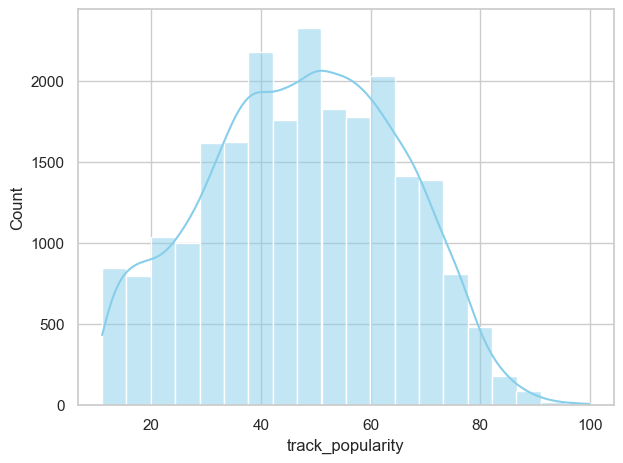

In [26]:
# Verificamos la distribuci√≥n del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue")
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

#### Variable tempo

In [27]:
# Detecci√≥n de outliers por m√©todo del desv√≠o est√°ndar.
data = df['tempo']
data_mean, data_std = np.mean(data), np.std(data)
cutoff = data_std*3
lower,upper = data_mean-cutoff, data_mean+cutoff
outliers_idx = np.argwhere((data<lower) | (data>upper))

# Copiamos el DataFrame original para comparar
df_original = df.copy()

# Eliminamos las canciones con tempo fuera de los l√≠mites establecidos
df = df[(df['tempo'] > lower) & (df['tempo'] < upper)]

print(f"Limite de corte inferior {round(lower,2)} bpm.")
print(f"Limite de corte superior {round(upper,2)} bpm.")
print(f"Se eliminan {len(outliers_idx)} entradas que exceden los l√≠mites de tempo.")

Limite de corte inferior 39.69 bpm.
Limite de corte superior 202.22 bpm.
Se eliminan 72 entradas que exceden los l√≠mites de tempo.


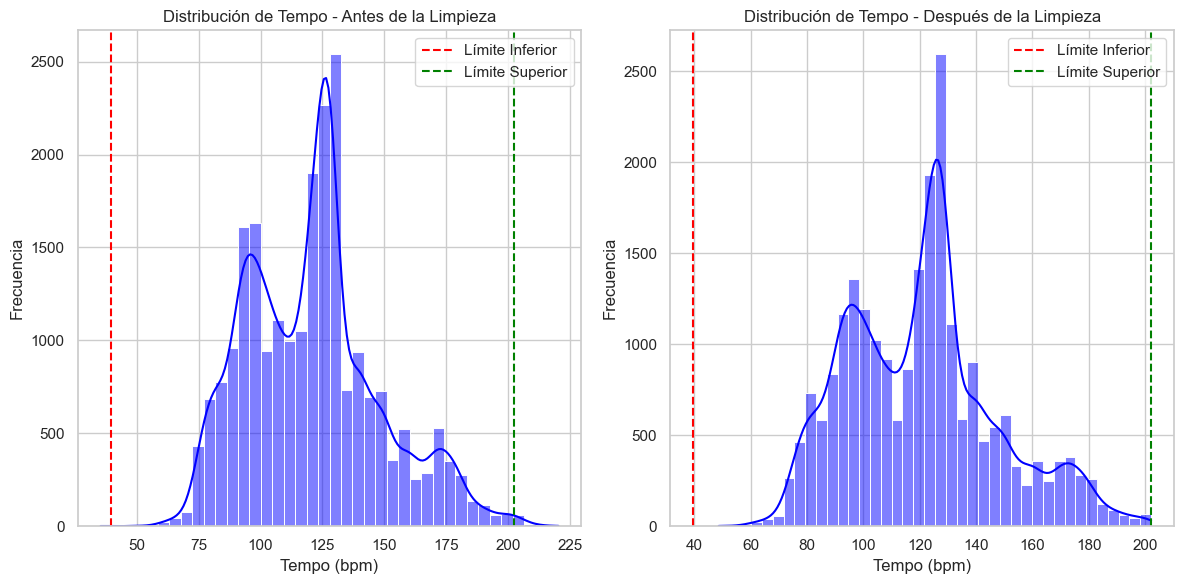

In [28]:
# Crear el gr√°fico
plt.figure(figsize=(12, 6))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(df_original['tempo'], bins=40, color='blue', kde=True)
plt.axvline(lower, color='red', linestyle='--', label='L√≠mite Inferior')
plt.axvline(upper, color='green', linestyle='--', label='L√≠mite Superior')
plt.title('Distribuci√≥n de Tempo - Antes de la Limpieza')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma despu√©s de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(df['tempo'], bins=40, color='blue', kde=True)
plt.axvline(lower, color='red', linestyle='--', label='L√≠mite Inferior')
plt.axvline(upper, color='green', linestyle='--', label='L√≠mite Superior')
plt.title('Distribuci√≥n de Tempo - Despu√©s de la Limpieza')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

#### Variable duracion_ms

In [29]:
# Detecci√≥n de outliers con m√©todo del rango intercuart√≠lico (IQR)
# An√°lisis por cuartiles
df_original = df.copy()
data = df['duration_ms']
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower,upper = q25-cutoff, q75+cutoff
outliers_idx = np.argwhere((data<lower) | (data>upper))

# An√°lisis por percentiles
q15, q85 = np.percentile(data, 15), np.percentile(data, 85)
iqr_per = q85 - q15
cutoff_per = iqr * 1.5
lower_per,upper_per = q15-cutoff_per, q85+cutoff_per
outliers_idx_per = np.argwhere((data<lower_per) | (data>upper_per))

In [30]:
print('An√°lisis por cuartiles:')
print('L√≠mite inferior ',lower)
print('L√≠mite superior ',upper)

An√°lisis por cuartiles:
L√≠mite inferior  88289.75
L√≠mite superior  347783.75


In [31]:
print('An√°lisis por percentiles:')
print('L√≠mite inferior ',lower_per)
print('L√≠mite superior ',upper_per)

An√°lisis por percentiles:
L√≠mite inferior  73305.0
L√≠mite superior  372711.8


Decidimos realizar el corte √∫nicamente por el percentil inferior. Es decir, pistas con una duraci√≥n menor a 1,2 min.

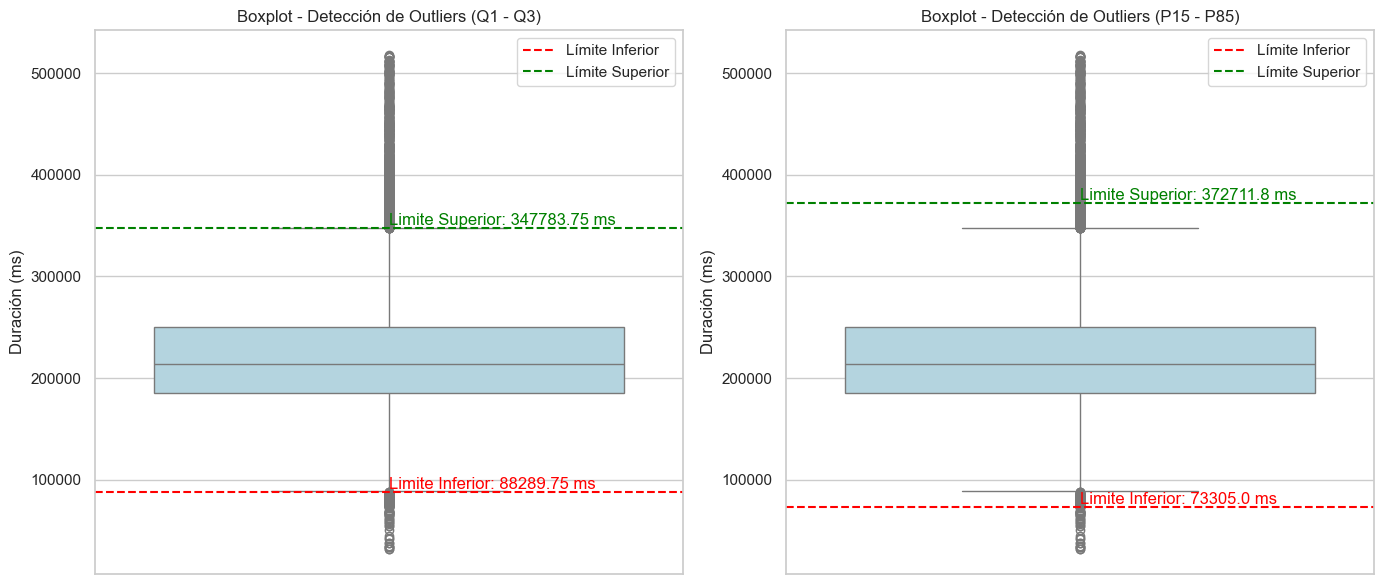

In [32]:
# Crear el gr√°fico
plt.figure(figsize=(14, 6))

# Boxplot para el an√°lisis IQR
plt.subplot(1, 2, 1)
sns.boxplot(data=df['duration_ms'], color='lightblue')
plt.axhline(lower, color='red', linestyle='--', label='L√≠mite Inferior')
plt.axhline(upper, color='green', linestyle='--', label='L√≠mite Superior')
plt.title('Boxplot - Detecci√≥n de Outliers (Q1 - Q3)')
plt.ylabel('Duraci√≥n (ms)')
plt.legend()

# Agregar texto con los valores l√≠mites
plt.text(0, lower, f'Limite Inferior: {round(lower, 2)} ms', color='red', verticalalignment='bottom')
plt.text(0, upper, f'Limite Superior: {round(upper, 2)} ms', color='green', verticalalignment='bottom')

# Boxplot para el an√°lisis por percentiles
plt.subplot(1, 2, 2)
sns.boxplot(data=df['duration_ms'], color='lightblue')
plt.axhline(lower_per, color='red', linestyle='--', label='L√≠mite Inferior')
plt.axhline(upper_per, color='green', linestyle='--', label='L√≠mite Superior')
plt.title('Boxplot - Detecci√≥n de Outliers (P15 - P85)')
plt.ylabel('Duraci√≥n (ms)')
plt.legend()

# Agregar texto con los valores l√≠mites para percentiles
plt.text(0, lower_per, f'Limite Inferior: {round(lower_per, 2)} ms', color='red', verticalalignment='bottom')
plt.text(0, upper_per, f'Limite Superior: {round(upper_per, 2)} ms', color='green', verticalalignment='bottom')

plt.tight_layout()
plt.show()

In [33]:
# Eliminamos las canciones con duraci√≥n fuera de los l√≠mites establecidos
df = df[df['duration_ms'] > lower_per]
outliers_idx_per = np.argwhere(data<lower_per)
print(f"Limite de corte inferior {round(lower_per,2)} ms.")
print(f"Se eliminan {len(outliers_idx_per)} entradas por debajo del l√≠mite de duraci√≥n.")

Limite de corte inferior 73305.0 ms.
Se eliminan 39 entradas por debajo del l√≠mite de duraci√≥n.


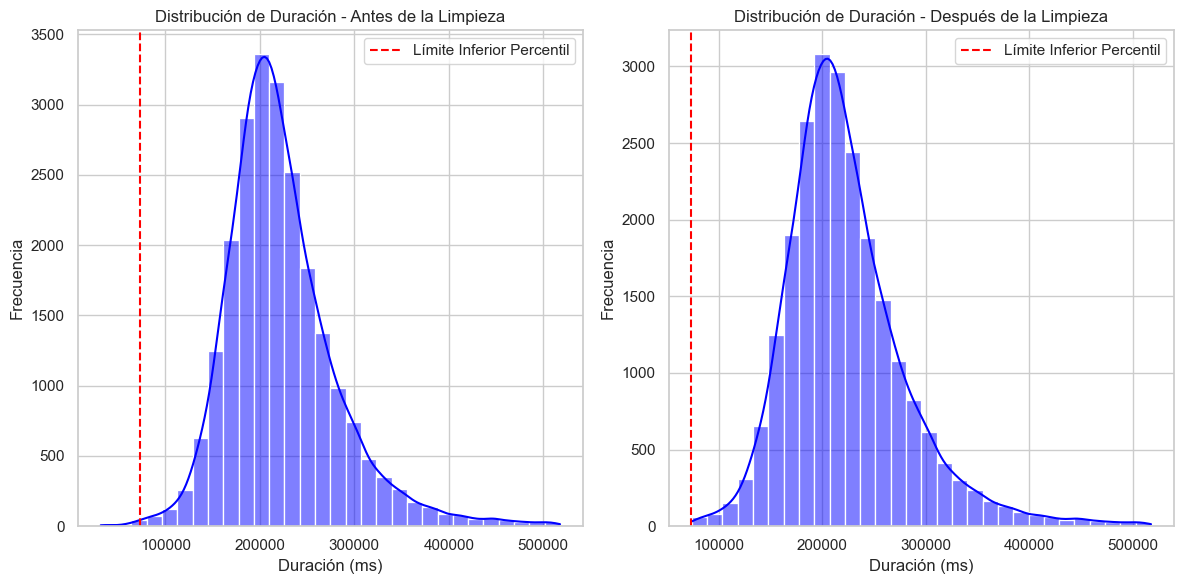

In [34]:
# Crear el gr√°fico
plt.figure(figsize=(12, 6))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(df_original['duration_ms'], bins=30, color='blue', kde=True)
plt.axvline(lower_per, color='red', linestyle='--', label='L√≠mite Inferior Percentil')
plt.title('Distribuci√≥n de Duraci√≥n - Antes de la Limpieza')
plt.xlabel('Duraci√≥n (ms)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma despu√©s de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(df['duration_ms'], bins=30, color='blue', kde=True)
plt.axvline(lower_per, color='red', linestyle='--', label='L√≠mite Inferior Percentil')
plt.title('Distribuci√≥n de Duraci√≥n - Despu√©s de la Limpieza')
plt.xlabel('Duraci√≥n (ms)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

#### Variable loudness

Identificamos que algunos outliers en la variable loudness, que presentaban pistas con un "volumen" extremadamente bajo.

In [35]:
# Verificamos la cantidad de canciones con loudness menor a -30 dB
df_original = df.copy()
loudness_threshold = -30
low_loudness_counts = df['loudness'] < loudness_threshold
print(low_loudness_counts)
print(f"Se identifica un total de {low_loudness_counts.sum()} pistas.")

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23085, dtype: bool
Se identifica un total de 4 pistas.


In [36]:
df[df['loudness'] < loudness_threshold]

track_id  \
17008  34v7cD6VR3fVYguedQ1wuh   
17010  28ilcqErfNjitJ7T3byHoX   
17016  61SiFnjiY36uVSTBVXK5Yw   
17018  5iAB4tlYseBES4MKqgY4KG   

                                              track_name  \
17008                                    Tropical Forest   
17010                                    Peaceful Forest   
17016  The Sound Of The Jungle With Coloured Birds Fo...   
17018                    Relaxing Crickets And Waterfall   

               track_artist  track_popularity          track_album_id  \
17008  The Sleep Specialist                54  3TRoUn8OKRVUcbprXmyGgj   
17010  The Sleep Specialist                51  3TRoUn8OKRVUcbprXmyGgj   
17016    Life Sounds Nature                44  5qukUq6sBLjghcEcFOdgKP   
17018  Natural Sound Makers                52  2GLxsxoWpW8MOw9O9AAsf9   

                                        track_album_name  \
17008                           Jungle And Forest Sounds   
17010                           Jungle And Forest Sounds   
17016  The Very Best Sound Of Nature - Birds, Waves, ...   
17018                                    Forest By Night   

      track_album_release_date    playlist_name             playlist_id  \
17008               2017-01-09  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17010               2017-01-09  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17016               2015-04-01  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   
17018               2017-01-09  Tropical Nights  37i9dQZF1DX0ES2mnOVvai   

      playlist_genre playlist_subgenre  danceability    energy  key  loudness  \
17008          latin          tropical        0.3110  0.377000    3   -36.509   
17010          latin          tropical        0.2110  0.425000    7   -46.448   
17016          latin          tropical        0.2260  0.442000   11   -36.624   
17018          latin          tropical        0.0787  0.000175    7   -35.960   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
17008     0       0.0366        0.1290             0.979    0.2470   0.0388   
17010     0       0.0542        0.8800             0.613    0.1840   0.0122   
17016     0       0.0562        0.0509             0.136    0.0791   0.0234   
17018     1       0.0580        0.1180             0.972    0.0793   0.0116   

         tempo  duration_ms  year  
17008   84.122       117449  2017  
17010  116.884       181204  2017  
17016   77.998        93010  2015  
17018  169.062       264154  2017

Decidimos eliminarlos por no tratarse de pistas musicales, son grabaciones de sonidos de la naturaleza.

In [37]:
# Eliminamos las canciones con loudness menor a -30 dB
df = df[df['loudness'] > loudness_threshold ]

In [38]:
# Verificamos la eliminacion de las canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
low_loudness_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23081, dtype: bool


0

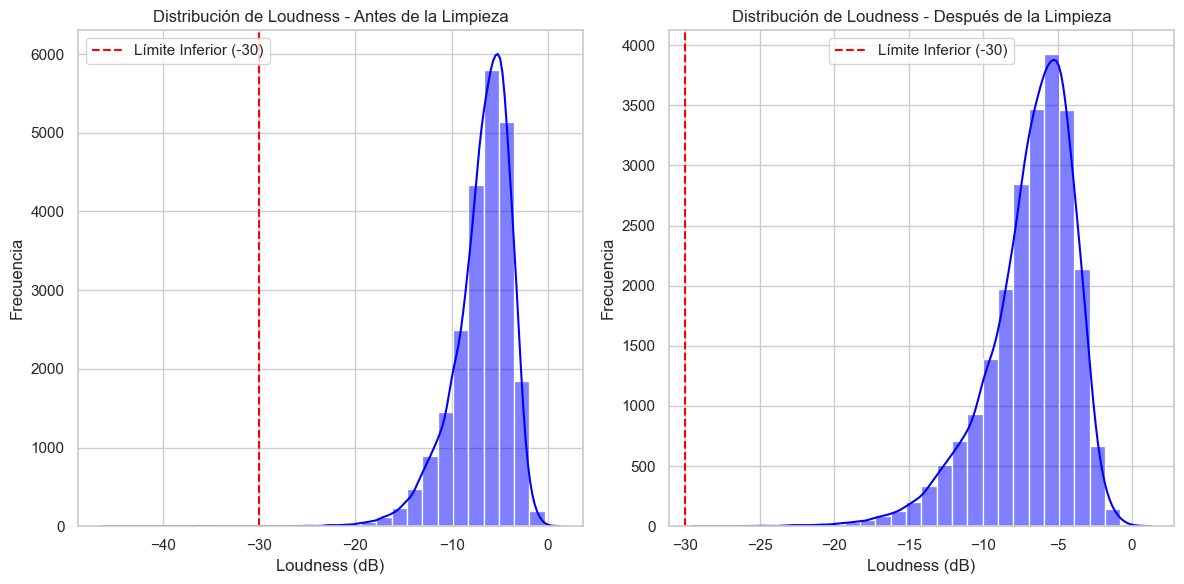

In [39]:
# Crear el gr√°fico
plt.figure(figsize=(12, 6))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
sns.histplot(df_original['loudness'], bins=30, color='blue', kde=True)
plt.axvline(loudness_threshold, color='red', linestyle='--', label='L√≠mite Inferior (-30)')
plt.title('Distribuci√≥n de Loudness - Antes de la Limpieza')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma despu√©s de la limpieza
plt.subplot(1, 2, 2)
sns.histplot(df['loudness'], bins=30, color='blue', kde=True)
plt.axvline(loudness_threshold, color='red', linestyle='--', label='L√≠mite Inferior (-30)')
plt.title('Distribuci√≥n de Loudness - Despu√©s de la Limpieza')
plt.xlabel('Loudness (dB)')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

## Transformaci√≥n de Variables y Selecci√≥n de Features

### Eliminaci√≥n de features string

Eliminamos los features string que describen la pista, el album o la playlist. √önicamente conservamos 'track_id' para referencia y 'playlist_genre' que ser√° usada m√°s adelante.

In [ ]:
df.drop(columns=['playlist_subgenre', 'track_album_release_date', 'playlist_name', 'playlist_id'], inplace=True)

_CAMBIO: se conservan 'track_name', 'track_artist', 'track_album_id', 'track_album_name'_

### Escalado de features num√©ricas

Realizamos un escalado 'MinMaxScaler' para trabajar con valores de rango [0, 1] en todas las features.

In [41]:
# Escalado de variables
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[['track_popularity','loudness','tempo','duration_ms','year']] = scaler.fit_transform(df[['track_popularity','loudness','tempo','duration_ms','year']])
df_scaled.describe()

track_popularity  danceability        energy           key  \
count      23081.000000  23081.000000  23081.000000  23081.000000   
mean           0.411510      0.656292      0.692901      5.353104   
std            0.197534      0.145038      0.183074      3.617693   
min            0.000000      0.077100      0.011800      0.000000   
25%            0.269663      0.564000      0.573000      2.000000   
50%            0.415730      0.673000      0.716000      6.000000   
75%            0.561798      0.762000      0.836000      9.000000   
max            1.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  23081.000000  23081.000000  23081.000000  23081.000000   
mean       0.737928      0.566613      0.107680      0.183468   
std        0.096845      0.495554      0.102151      0.225487   
min        0.000000      0.000000      0.022400      0.000001   
25%        0.690556      0.000000      0.040900      0.016100   
50%        0.755643      1.000000      0.062400      0.085800   
75%        0.805520      1.000000      0.133000      0.272000   
max        1.000000      1.000000      0.918000      0.992000   

       instrumentalness      liveness       valence         tempo  \
count      23081.000000  23081.000000  23081.000000  23081.000000   
mean           0.085304      0.188438      0.509312      0.469421   
std            0.225892      0.152531      0.232680      0.173978   
min            0.000000      0.009360      0.000010      0.000000   
25%            0.000000      0.092700      0.329000      0.334020   
50%            0.000016      0.126000      0.510000      0.477115   
75%            0.004810      0.243000      0.691000      0.558260   
max            0.994000      0.996000      0.991000      1.000000   

        duration_ms          year  
count  23081.000000  23081.000000  
mean       0.336007      0.864567  
std        0.131468      0.181737  
min        0.000000      0.000000  
25%        0.252155      0.825397  
50%        0.315769      0.952381  
75%        0.398182      0.984127  
max        1.000000      1.000000

### Correcci√≥n de skewness

Aplicamos un proceso de correcci√≥n del sesgo (skewness) analizando distintas transformaciones posibles para normalizar cada feature num√©rico intentando aproximarlo a una distribuci√≥n gausiana. Se utiliza la transformaci√≥n que mejor se adapta a los datos.

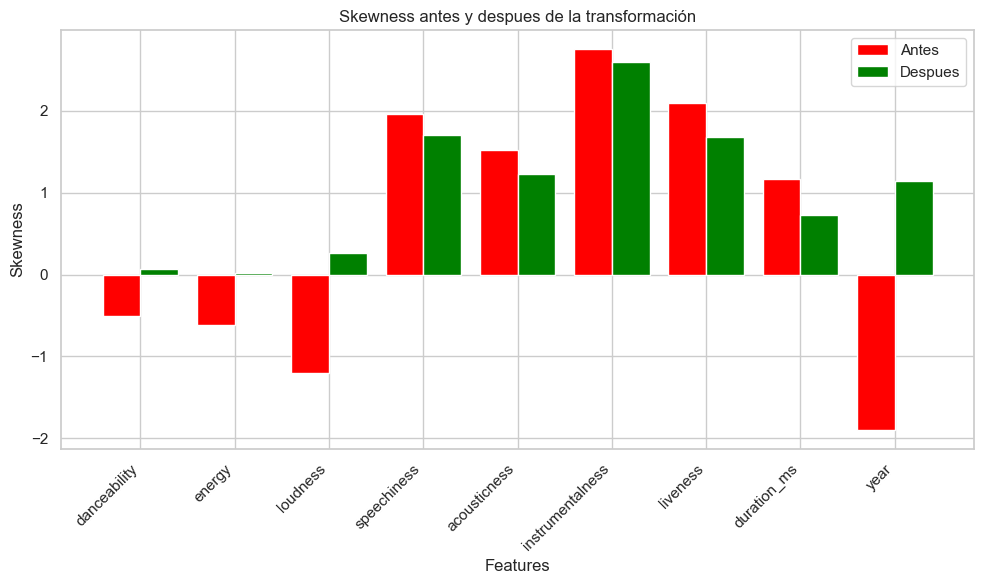

In [42]:
skew_df = pd.DataFrame(columns=['feature', 'before', 'after', 'transformer'])

def remove_skewness(feature, df_scaled):

    skew = df_scaled[feature].skew()
    output = df_scaled[feature]
    row = [feature, skew, 0, 'None'] 
    transformers = [np.log1p, np.sqrt] if skew > 0 else [np.square, np.exp, lambda x: x**3]
    
    for transformer in transformers:
        sample = transformer(df_scaled[feature] + 1) if transformer == np.sqrt else transformer(df_scaled[feature])
        if abs(sample.skew()) < abs(skew):
            skew = abs(sample.skew())
            output = sample
            row[2] = skew  
            row[3] = transformer._name_ if hasattr(transformer, '_name_') else str(transformer)

    skew_df.loc[len(skew_df)] = row
    return output

categorical_feat = []
numerical_feat = []

#Separamos nuestro dataset entre variables numericas y categoricas
for col in df_scaled.columns:
  if df_scaled[col].dtype == 'object':
    categorical_feat.append(col)
  else:
    numerical_feat.append(col)
  
skewed_features = [feat for feat in numerical_feat if abs(df_scaled[feat].skew()) >= 0.5]

#Aplicamos el skew solo a las variables numericas
for feat in skewed_features:
  df_scaled[feat] = remove_skewness(feat, df_scaled)

#Graficamos
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = range(len(skew_df))
bars_before = ax.bar(index, skew_df['before'], bar_width, label='Antes', color='red')
bars_after = ax.bar([i + bar_width for i in index], skew_df['after'], bar_width, label='Despues', color='green')
ax.set_xlabel('Features')
ax.set_ylabel('Skewness')
ax.set_title('Skewness antes y despues de la transformaci√≥n')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(skew_df['feature'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

### An√°lisis de Tonalidad ('Key')

Aplicamos One Hot Encoding para crear variables dummies del feature 'key' (cada entero representa una tonalidad diferente). 

In [43]:
df_scaled['key'] = df_scaled['key'].astype(int)

# Realizar el one-hot encoding para la variable key
one_hot_encoded = pd.get_dummies(df_scaled['key'], prefix='key')

# Creamos un nuevo DataFrame one-hot encoded para key
df_key = pd.concat([df_scaled, one_hot_encoded], axis=1)

Observamos la correlaci√≥n de cada tonalidad con 'track_popularity'

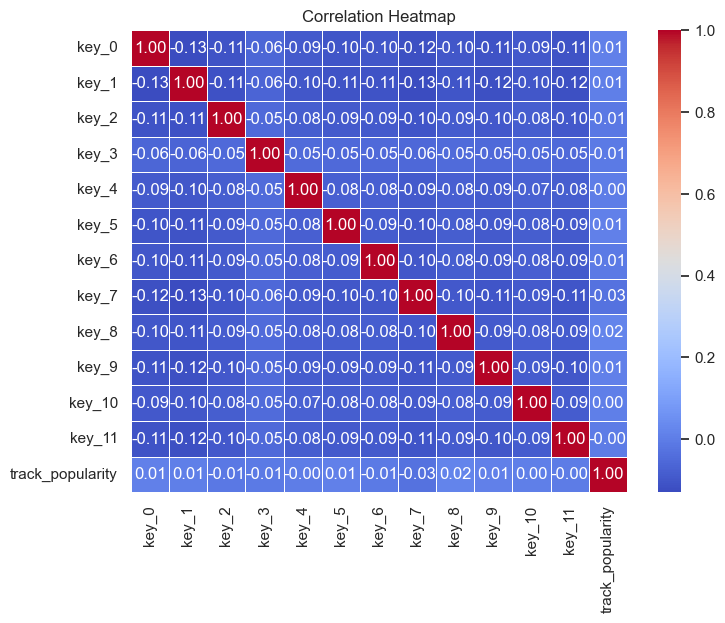

In [44]:
subset = []
subset = df_key[[col for col in df_key.columns if col.startswith('key_')] + ['track_popularity']]


corr_matrix = subset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Dado que la tonalidad (key) no presenta correlaci√≥n con 'track_popularity' ser√° desestimada.

In [45]:
df_scaled.drop(columns=['key'], inplace=True)

In [ ]:
#Exportamos dataset escalado con selecci√≥n de features
df_scaled.to_csv('datasets/df_songs.csv', index=False)